In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation

# Projectile Kinematics Given Velocity for All Angles

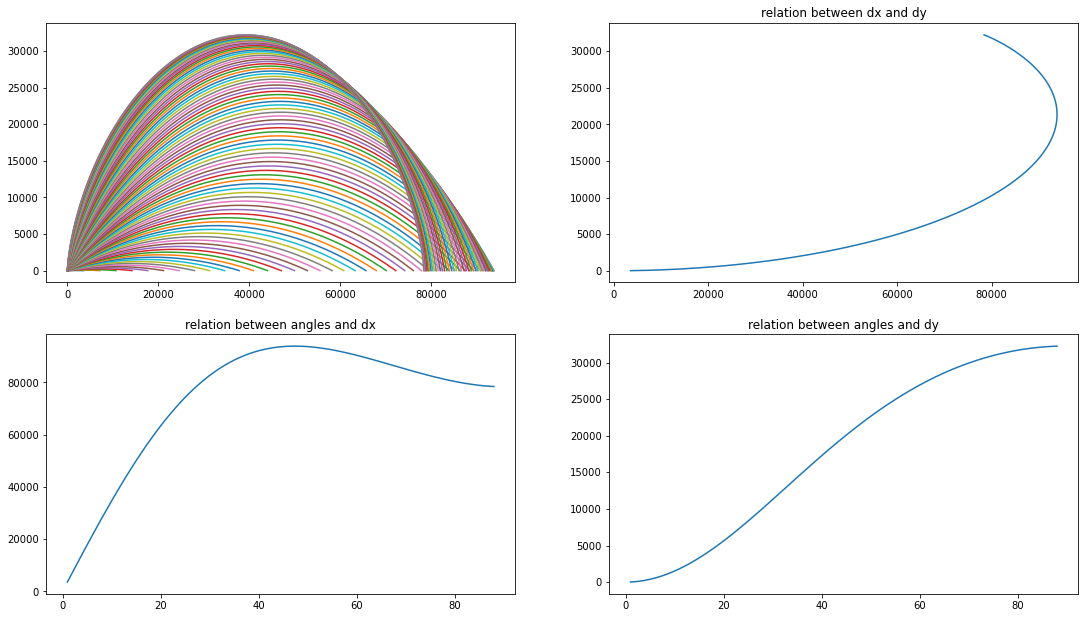

angle with the highest x displacement is  47
angle with the shortest x displacement is  1
angle with the highest y displacement is  88
angle with the shortest y displacement is  1


In [4]:
h_dist=[]
v_dist=[]
angles=[]
ground=0

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

for i in range(1,89,1):
    x = []
    y = []

    x_i = 0
    y_i = 0
    y_f = y_i
    x_f = x_i

    v_i = 1000
    g = 9.8
    do = i
    deg = (np.pi/180)
    v_x = v_i * np.cos(do*deg) 
    v_y = v_i * np.sin(do*deg)
    dt=1
    
    angles.append(do)    
    angle_fliped=0
    
    while y_f >= ground:
        
        # calc position at this instant
        dt = dt/100 # define the time steps
        x_f += v_x * dt
        y_f += v_y * dt 

        x.append(x_f)
        y.append(y_f)
        
        # new v_i 
        v_i = (v_x**2 + v_y**2)**(1/2)
        
        v_x = v_i * np.cos(do*deg)
        v_y = v_i * np.sin(do*deg) - g*dt

        # new angle 
        do = (np.arcsin(v_y/v_i)) / deg
        
        # get max y when angle flips (starts falling)
        if do < 0 and angle_fliped == 0:
            y_max = y_f
            angle_fliped = 1
            
        dt = dt + 1
        
    h_dist.append(x_f)
    v_dist.append(y_max)
    y_max = 0
    
    axs[0, 0].plot(x, y)


axs[0, 1].set_title("relation between dx and dy")
axs[0, 1].plot(h_dist,v_dist)

axs[1, 0].set_title("relation between angles and dx")
axs[1, 0].plot(angles,h_dist)

axs[1, 1].set_title("relation between angles and dy")
axs[1, 1].plot(angles,v_dist)

plt.show()

print("angle with the highest x displacement is  " + str(angles[h_dist.index(max(h_dist))]))
print("angle with the shortest x displacement is  " + str(angles[h_dist.index(min(h_dist))]))
print("angle with the highest y displacement is  " + str(angles[v_dist.index(max(v_dist))]))
print("angle with the shortest y displacement is  " + str(angles[v_dist.index(min(v_dist))]))

# Animating One Projectile 

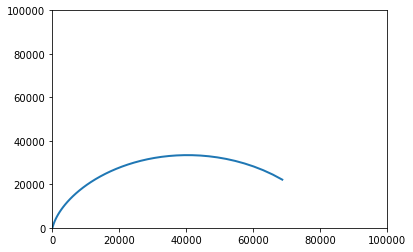

In [53]:
from IPython.display import HTML
fig = plt.figure() 
ax = plt.axes(xlim=(0, 100000), ylim=(0, 100000)) 
line, = ax.plot([], [], lw=2) 

def init(): 
    global x_f, y_f, deg, g, do, v_i, v_x, v_y, x, y
    x=[]
    y=[]
    x_f=0
    y_f=0
    deg=np.pi/180
    g=9.8
    do=80
    v_i=1000

    x_i=0
    y_i=0

    v_x=v_i * np.cos(do*deg)
    v_y=v_i * np.sin(do*deg)
    
    line.set_data([], []) 
    return line,

def animate(i): 
    global x_f, y_f, deg, g, do, v_i, v_x, v_y
    
    dt = i*0.1 # define the time steps
    x_f += v_x * dt
    y_f += v_y * dt 

    x.append(x_f)
    y.append(y_f)

    # new v_i 
    v_i = (v_x**2 + v_y**2)**(1/2)
    v_x = v_i * np.cos(do*deg)
    v_y = v_i * np.sin(do*deg) - g*dt

    # new angle 
    do = (np.arcsin(v_y/v_i)) / deg
    
    line.set_data(x, y) 
    return line, 

anim = animation.FuncAnimation(fig, animate, init_func=init,  
                               frames=50, interval=20, blit=True) 
HTML(anim.to_html5_video())

# Two Different Masses With Collision

C:\Users\omar\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


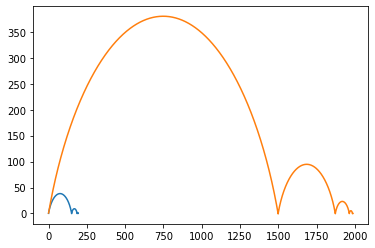

In [54]:
masses = [100, 10]
velocities = [31.6, 100]

# KE = 0.5*m*v_i**2 

for m, v_i in zip(masses, velocities):
    x = []
    y = []

    y_f = 0
    x_f = 0

    g = 9.8
    do = 60
    deg = (np.pi/180)

    KE = 0.5*m*v_i**2

    v_x = v_i * np.cos(do*deg) 
    v_y = v_i * np.sin(do*deg)
    dt=1

    ground=0

    while KE > 0:
        KE -= energy_loss # remove sound/heat energy loss
        v_i = (2*KE/m)**(1/2) # calc the new velocity  after collision

        do = 60 # angle is the same 
        y_f = 0

        while y_f >= ground:

            # calc position at this instant
            dt = dt/100 # define the time steps
            x_f += v_x * dt
            y_f += v_y * dt 

            x.append(x_f)
            y.append(y_f)

            # new v_i 
            v_x = v_i * np.cos(do*deg)
            v_y = v_i * np.sin(do*deg) - g*dt

            # new angle 
            do = (np.arcsin(v_y/v_i)) / deg

            dt = dt + 1

        energy_loss = 0.5*KE + 5*m # due to heat or sound

    plt.plot(x, y)

plt.show()